<h2 style='color:blue' align='center'>Cats and Dogs Classification Using Convolutional Neural Network (CNN) and SVM</h2>

<img src="small_images.jpg" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import os

<h2 style="color:purple">Load the dataset</h2>

In [1]:
import splitfolders
import os
path = r"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted\train"
print(os.listdir(path))
len(os.listdir(path))

['cats', 'dogs']


2

In [17]:
from PIL import Image

# Path to the image file
image_path = r"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted\val\cats\cat.86.jpg"

# Open the image file
with Image.open(image_path) as img:
    # Get the image shape (width, height)
    image_shape = img.size
    # Get the image mode (e.g., RGB, grayscale)
    image_mode = img.mode

# Print the image shape and mode
print("Image shape:", image_shape)
print("Image mode:", image_mode)


Image shape: (499, 493)
Image mode: RGB


In [22]:
splitfolders.ratio(path,seed=1337, output="dogscats-Splitted", ratio=(0.9, 0.05, 0.05))

Copying files: 10000 files [00:11, 843.26 files/s]


In [ ]:
"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted"

In [6]:
BATCH_SIZE = 32
DATA_DIRT = (r"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted\train")
DATA_DIRTE = (r"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted\test")
DATA_DIRV = (r"C:\Users\Lenovo\Downloads\intern_projects\dogscats\dogscats-Splitted\val")
IMG_SIZE = 256
MAX_EPOCHS = 25
class_names = ['cats', 'dogs']
class_details = ['cats', 'dogs']
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators with augmentation for train set and rescaling only for validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


# Define batch size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    DATA_DIRT,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    DATA_DIRV,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    DATA_DIRTE,
    target_size=(499, 375),
    batch_size=batch_size,
    class_mode='categorical')


Found 9000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Load pre-trained feature extractor model
pretrained_efficientnet_v2_base = tf.keras.applications.EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    pooling="avg"
)
pretrained_efficientnet_v2_base.trainable = False

# Define the SVM model
svm_model = make_pipeline(
    StandardScaler(),  # Normalize features
    SVC(kernel='linear', C=1.0)  # Linear SVM classifier
)

# Function to extract features from images
def extract_features(images):
    images = tf.image.resize(images, (IMG_SIZE, IMG_SIZE))  # Resize images
    features = pretrained_efficientnet_v2_base.predict(images)
    return features

# Extract features from training data
train_features = []
train_labels = []
for images, labels in train_generator:
    features = extract_features(images)
    train_features.append(features)
    train_labels.append(labels)
    if len(train_features) * BATCH_SIZE >= len(train_generator.filenames):
        break

train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

# Convert one-hot encoded labels to 1D array
train_labels_indices = np.argmax(train_labels, axis=1)

# Train SVM model
svm_model.fit(train_features, train_labels_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Define data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_generator = test_datagen.flow_from_directory(
    DATA_DIRTE,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for consistent evaluation
)

# Extract features and labels from test data
test_features = []
test_labels = []
for images, labels in test_generator:
    features = extract_features(images)
    test_features.append(features)
    test_labels.append(labels)
    if len(test_features) * BATCH_SIZE >= len(test_generator.filenames):
        break

test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)
test_labels_indices = np.argmax(test_labels, axis=1)

# Predict labels for test data
predicted_labels_indices = svm_model.predict(test_features)

# Compute accuracy
accuracy = accuracy_score(test_labels_indices, predicted_labels_indices)
print("Test Accuracy:", accuracy)

# Generate classification report
class_names = [class_names[i] for i in range(len(class_names))]
report = classification_report(test_labels_indices, predicted_labels_indices, target_names=class_names)
print("Classification Report:")
print(report)


Found 500 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
Test Accuracy: 0.742
Classification Report:
              precision    recall  f1-score   support

        cats       0.78      0.68      0.72       250
        dogs       0.72      0.80      0.76       250

    accuracy                           0.74       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.75     

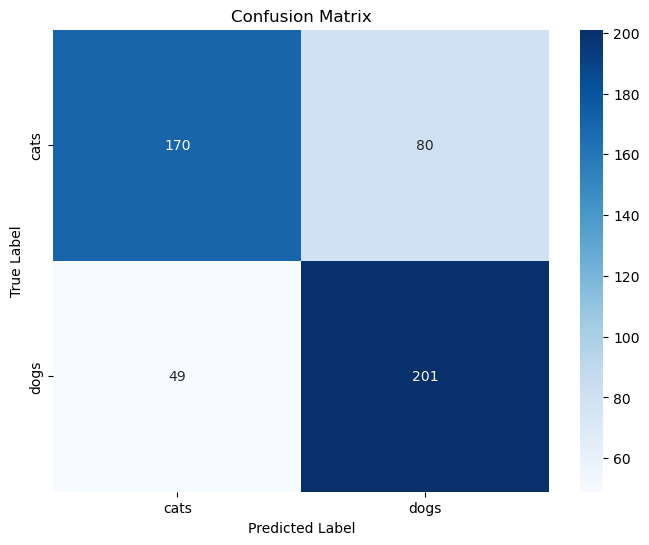

Test Accuracy: 0.742
Classification Report:
              precision    recall  f1-score   support

        cats       0.78      0.68      0.72       250
        dogs       0.72      0.80      0.76       250

    accuracy                           0.74       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.75      0.74      0.74       500



In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels_indices, predicted_labels_indices)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Compute accuracy
accuracy = accuracy_score(test_labels_indices, predicted_labels_indices)
print("Test Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(test_labels_indices, predicted_labels_indices, target_names=class_names)

# Display classification report
print("Classification Report:")
print(class_report)


In [16]:
from joblib import dump

# Save the SVM model
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']